In [5]:
from tqdm import tqdm
from tqdm.notebook import tqdm
import json, itertools
import glob
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cv2
from scipy.ndimage import label

train = glob.glob("/home/yiw/kg_unet/input/train/*")
test = glob.glob("/home/yiw/kg_unet/input/test/*")

annotations = {}

# Open the annotations file
with open('/home/yiw/kg_unet/input/polygons.jsonl', 'r') as f:
    for line in f:
        annotation = json.loads(line)
        image_id = annotation['id']
        image_annotations = annotation['annotations']

        annotations[image_id] = image_annotations

image_map = {impath.split('/')[-1].split('.')[0]: impath for impath in train}
image_map.update({impath.split('/')[-1].split('.')[0]: impath for impath in test})

os.makedirs("/home/yiw/kg_unet/input/mask", exist_ok=True)
def make_semantic_mask(annotations):
    for _, image_id in enumerate(tqdm(list(annotations.keys()))):
        polygons = annotations[image_id]
        mk = np.zeros((512, 512), dtype=np.uint8)
        mask_path = image_map[image_id].replace("train", "mask").replace(".tif", ".png")
        print(mask_path)
        for polygon in polygons:
            if polygon["type"] != "blood_vessel": continue
            lines = np.array(polygon['coordinates'])
            lines = lines.reshape(-1, 1, 2)
            cv2.fillPoly(mk, [lines], 1)
        mk *= 255
        cv2.imwrite(mask_path, mk, [cv2.IMWRITE_PNG_COMPRESSION, 1])

make_semantic_mask(annotations)

  0%|          | 0/1633 [00:00<?, ?it/s]

/home/yiw/kg_unet/input/mask/0006ff2aa7cd.png
/home/yiw/kg_unet/input/mask/00168d1b7522.png
/home/yiw/kg_unet/input/mask/0033bbc76b6b.png
/home/yiw/kg_unet/input/mask/003504460b3a.png
/home/yiw/kg_unet/input/mask/004daf1cbe75.png
/home/yiw/kg_unet/input/mask/005715f0a313.png
/home/yiw/kg_unet/input/mask/00654cc08aac.png
/home/yiw/kg_unet/input/mask/00656c6f2690.png
/home/yiw/kg_unet/input/mask/0067d5ad2250.png
/home/yiw/kg_unet/input/mask/00ca2f4c8918.png
/home/yiw/kg_unet/input/mask/00d75ad65de3.png
/home/yiw/kg_unet/input/mask/00da70813521.png
/home/yiw/kg_unet/input/mask/00da8fdf2391.png
/home/yiw/kg_unet/input/mask/00f560a6a72b.png
/home/yiw/kg_unet/input/mask/014b60dfe193.png
/home/yiw/kg_unet/input/mask/016c33dacfa1.png
/home/yiw/kg_unet/input/mask/019390572feb.png
/home/yiw/kg_unet/input/mask/01a7fca6263b.png
/home/yiw/kg_unet/input/mask/025ec20b8b73.png
/home/yiw/kg_unet/input/mask/0276eb166cce.png
/home/yiw/kg_unet/input/mask/02cf5c2db152.png
/home/yiw/kg_unet/input/mask/02d20

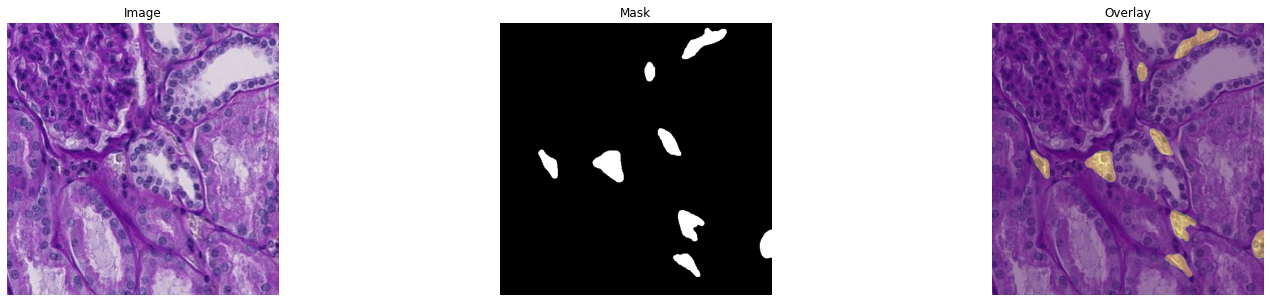

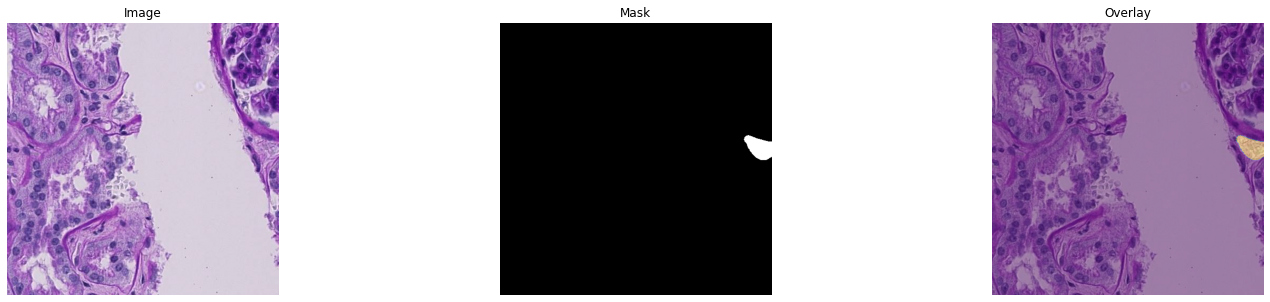

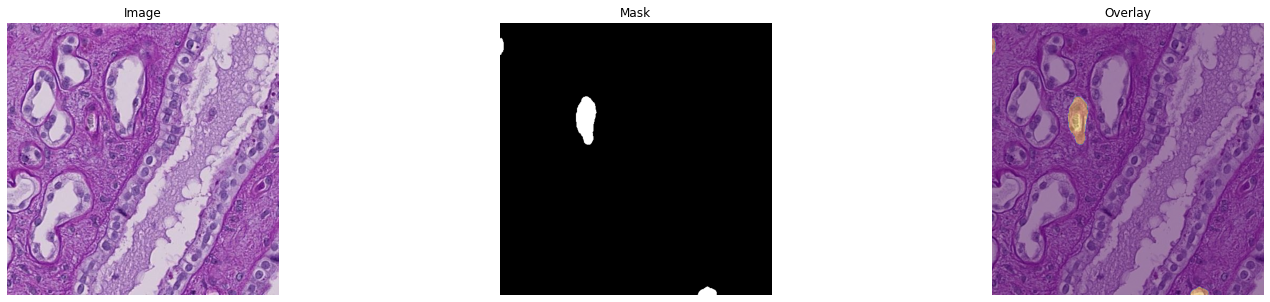

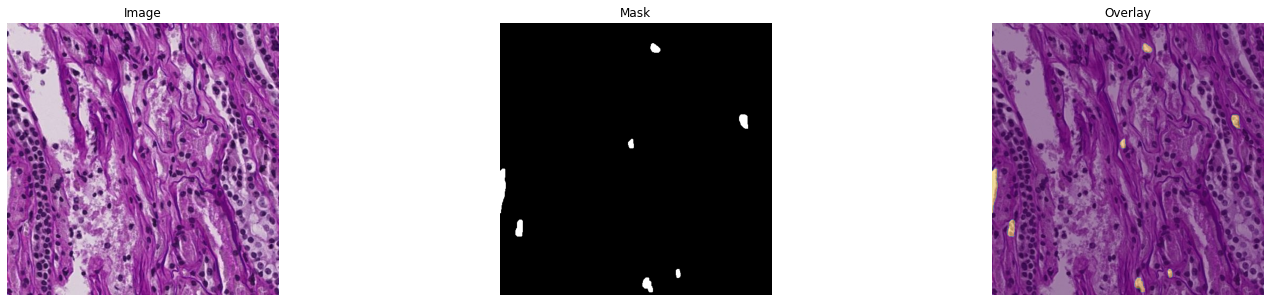

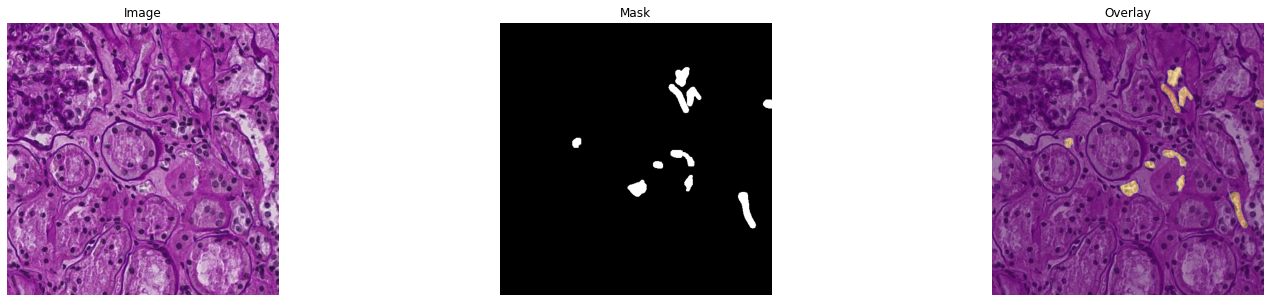

In [9]:
import glob
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cv2
from scipy.ndimage import label

def preprocess_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (512 , 512))
    return image_resized

preprocessed_images = {}
for i, image_id in enumerate(list(annotations.keys())):
    if image_id in image_map:
        image = cv2.imread(image_map[image_id])
        preprocessed_image = preprocess_image(image.copy())
        preprocessed_image_normalized = preprocessed_image / 255.0
        preprocessed_images[image_id] = preprocessed_image_normalized

def display_images_masks_overlays(image, mask, image_id):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(mask, cmap="gray")
    plt.title('Mask')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.4)
    plt.title('Overlay')
    plt.axis('off')
    plt.show()

for image_id in list(annotations.keys())[:5]:
    image = preprocessed_images[image_id]
    mask_path = image_map[image_id].replace("train", "mask").replace(".tif", ".png")
    mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
    display_images_masks_overlays(image, mask, image_id)